In [1]:
import numpy as np
import os
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
# import seaborn as sns
import pickle
import time
import gc
from tqdm import tqdm, tqdm_notebook

%matplotlib inline

#每次可以输出多个变量
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

import warnings
warnings.filterwarnings("ignore")

#中文字体
import matplotlib
matplotlib.use('qt4agg')
#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel('./data/data.xlsx')

In [3]:
df.shape
df.head()

(114183, 135)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,199801010001,1998,1,1,NaN,0,NaT,34,Burundi,11,Sub-Saharan Africa,Bujumbura Mairie,Bujumbura,-3.375828,29.364107,1.0,0,The incident occurred at Bujumbura Airport.,01/01/1998: Hutu Rebels attacked a Burundi mil...,1,1,1,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,34.0,"Military Personnel (soldiers, troops, officers...",Burundi Military,Burundi Military at Bujumbura Airport,34.0,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hutu extremists,NaN,NaN,NaN,NaN,NaN,Unknown,0.0,NaN,NaN,0,100.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,0.0,100.0,6.0,0.0,NaN,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"“Burundi Rebels, Ex-Rwandan Army Soldiers Blam...",“Burundi--Attack Reported on Bujumbura Airport...,NaN,CETIS,0,1,0,1,NaN
1,199801010002,1998,1,1,NaN,0,NaT,167,Russia,9,Eastern Europe,Moscow (Federal City),Moscow,55.751377,37.579914,1.0,0,NaN,"01/01/1998: In Russia, a small bomb hidden in ...",1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,19,Transportation,102.0,Subway,Moscow Metro System,An underground passage in the Moscow Metro,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,Unknown,0.0,NaN,NaN,0,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,14.0,Time Fuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"“Bomb injures 3 in Moscow subway system,” The ...","“Bomb injures 3 in Moscow subway,” Charleston ...","“Bomb Injures 3 Workers in Moscow Metro,” Los ...",CETIS,-9,-9,0,-9,NaN
2,199801010003,1998,1,1,NaN,0,NaT,603,United Kingdom,8,Western Europe,Northern Ireland,Belfast,54.607712,-5.956210,1.0,0,Belfast (Capital City),01/01/1998: The breakaway Loyalist Volunteer F...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,Civilian,Eddie Trainor,233.0,Northern Ireland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Loyalist Volunteer Forces (LVF),NaN,NaN,NaN,NaN,NaN,Unknown,0.0,NaN,NaN,0,NaN,0.0,1,8.0,Personal claim,NaN,NaN,NaN,NaN,NaN,NaN,-9.0,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,“Protestant gunmen kill Catholic in New Ye

In [ ]:
'Muslim extremists'

In [4]:
df.gname.value_counts()

Unknown                                               59502
Taliban                                                7474
Islamic State of Iraq and the Levant (ISIL)            5612
Al-Shabaab                                             3288
Boko Haram                                             2418
Communist Party of India - Maoist (CPI-Maoist)         1878
New People's Army (NPA)                                1800
Maoists                                                1619
Tehrik-i-Taliban Pakistan (TTP)                        1351
Revolutionary Armed Forces of Colombia (FARC)          1331
Kurdistan Workers' Party (PKK)                         1285
Houthi extremists (Ansar Allah)                        1062
Al-Qaida in the Arabian Peninsula (AQAP)               1020
Liberation Tigers of Tamil Eelam (LTTE)                 656
Al-Qaida in Iraq                                        638
Donetsk People's Republic                               624
Muslim extremists                       

In [47]:
def pic_count(x):
    df[x] = df[x].apply(str)
    _ = plt.title(x)
    _ = plt.plot(df.groupby([x]).eventid.count(), 'r-o')
    for a, b in zip(sorted(df[x].unique()), df.groupby([x]).eventid.count()):  
        _ = plt.text(a, b, b, ha='center', va='bottom', fontsize=10)
        
def pic_bar(x):
    df[x] = df[x].apply(str)
    _ = plt.title(x)
    _ = plt.bar(sorted(df[x].unique()), df.groupby([x]).eventid.count())
    for a, b in zip(sorted(df[x].unique()), df.groupby([x]).eventid.count()):  
        _ = plt.text(a, b, b, ha='center', va='bottom', fontsize=10)
        
def pic_hist(x):
    df[x] = df[x].fillna(int(df[x].mean()))
    _ = plt.title(x)
    _ = plt.hist(df[x].tolist(), bins=[0, 5, 10, 20, 50, 100])

In [53]:
df.dbsource.value_counts()

START Primary Collection                    78001
ISVG                                        17207
CETIS                                       16163
UMD Schmid 2012                              1165
UMD Algeria 2010-2012                         847
UMD Sri Lanka 2011                            371
UMD Miscellaneous                             146
UMD JTMM Nepal 2012                           104
Eco Project 2010                               92
Anti-Abortion Project 2010                     26
UMD Encyclopedia of World Terrorism 2012       19
UMD Assassinations Project                     14
Hewitt Project                                 12
UMD Black Widows 2011                           7
Leuprecht Canadian Data                         6
Sageman                                         3
Name: dbsource, dtype: int64

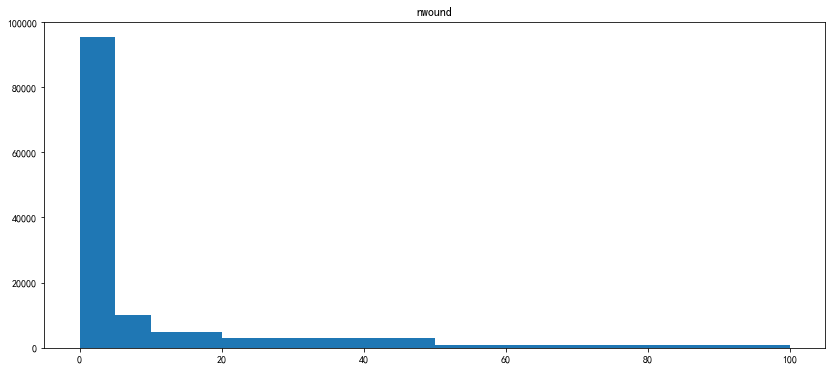

In [51]:
pic_hist('nwound')